In [3]:
import torch

from grape.datasets import BradleyDoublePlus

from grape.models import SimpleGNN, MGConv
from torch import nn
import torch

data = BradleyDoublePlus(split_type='random')

node_hidden_dim = 128
batch_size = 32

#model_message = MPNN(num_layers=2, edge_hidden_dim=128, node_hidden_dim=node_hidden_dim, 
#                node_in_dim=data.num_node_features, edge_in_dim=data.num_edge_features,
#                num_gru_layers=1)

model_message = MGConv(edge_hidden_dim=128, node_hidden_dim=node_hidden_dim, node_in_dim=data.num_node_features, edge_in_dim=data.num_edge_features)

out_model = nn.Sequential(
    nn.Linear(node_hidden_dim, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)


model = SimpleGNN(model_message=model_message,
                  out_model=out_model)

train, val, test = data.train, data.val, data.test

from grape.utils import RayTuner
from grape.optim import adam_objective, adam_default_search_space


objective = adam_objective
search_space = adam_default_search_space()

optimizer = RayTuner(adam_objective, search_space=search_space,train_loader=train, val_loader=val, model=model)



In [4]:
from grape.utils import split_data
print(split_data.__module__)

grape.utils.split_utils


In [5]:
optimizer.fit()

2024-04-16 12:09:27,012	INFO worker.py:1752 -- Started a local Ray instance.
2024-04-16 12:09:27,540	INFO tune.py:263 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2024-04-16 12:09:27,542	INFO tune.py:613 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


TypeError: BayesOptSearch.set_search_properties() missing 1 required positional argument: 'config'

In [3]:
import torch

from grape.datasets import BradleyDoublePlus
data = BradleyDoublePlus()
data.std_target

test = torch.ones(10)
data.rescale_data(test)

tensor([157.9895, 157.9895, 157.9895, 157.9895, 157.9895, 157.9895, 157.9895,
        157.9895, 157.9895, 157.9895])

In [2]:
from grape.utils import DataSet
from grape.datasets import BradleyDoublePlus
#data = DataSet(file_path='/Users/faerte/Desktop/grape/notebooks/data/processed/BradleyDoublePlus.pickle')
data = BradleyDoublePlus(atom_feature_list=['atom_total_degree_one_hot'],
                         bond_feature_list=['bond_type_one_hot'],)
ex = data.data[1]
print(ex)

from grape.models.layers import DMPNN
model = DMPNN()
print(ex.edge_index)
print(ex.x)
print(model(ex.x, ex.edge_index, ex.edge_attr))


Data(x=[3, 7], edge_index=[2, 4], edge_attr=[4, 4], y=[1])
init
tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])
x shape:  torch.Size([3, 7])
message
----------
current node: tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])
current node shape: tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])
update
-----------
current aggr: tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])
current node shape: torch.Size([3, 7])
nodes out shape:  torch.Size([3, 7])
tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])


In [ ]:
from grape.utils import EarlyStopping
early_stopper = EarlyStopping(patience=30)

from torch.optim import lr_scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.9, patience=10)

from grape.utils import train_model

train_loss, val_loss = train_model(model = model,
                                   loss_func = loss_func,
                                   optimizer = optimizer,
                                   train_data_loader= train,
                                   val_data_loader = val,
                                   batch_size=batch_size,
                                   epochs=500,
                                   early_stopper=early_stopper,
                                   scheduler=scheduler)

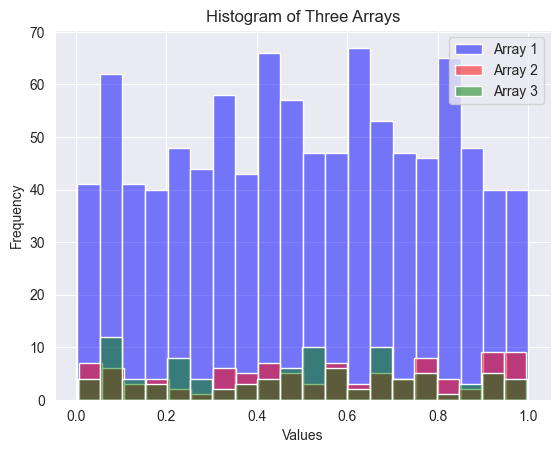

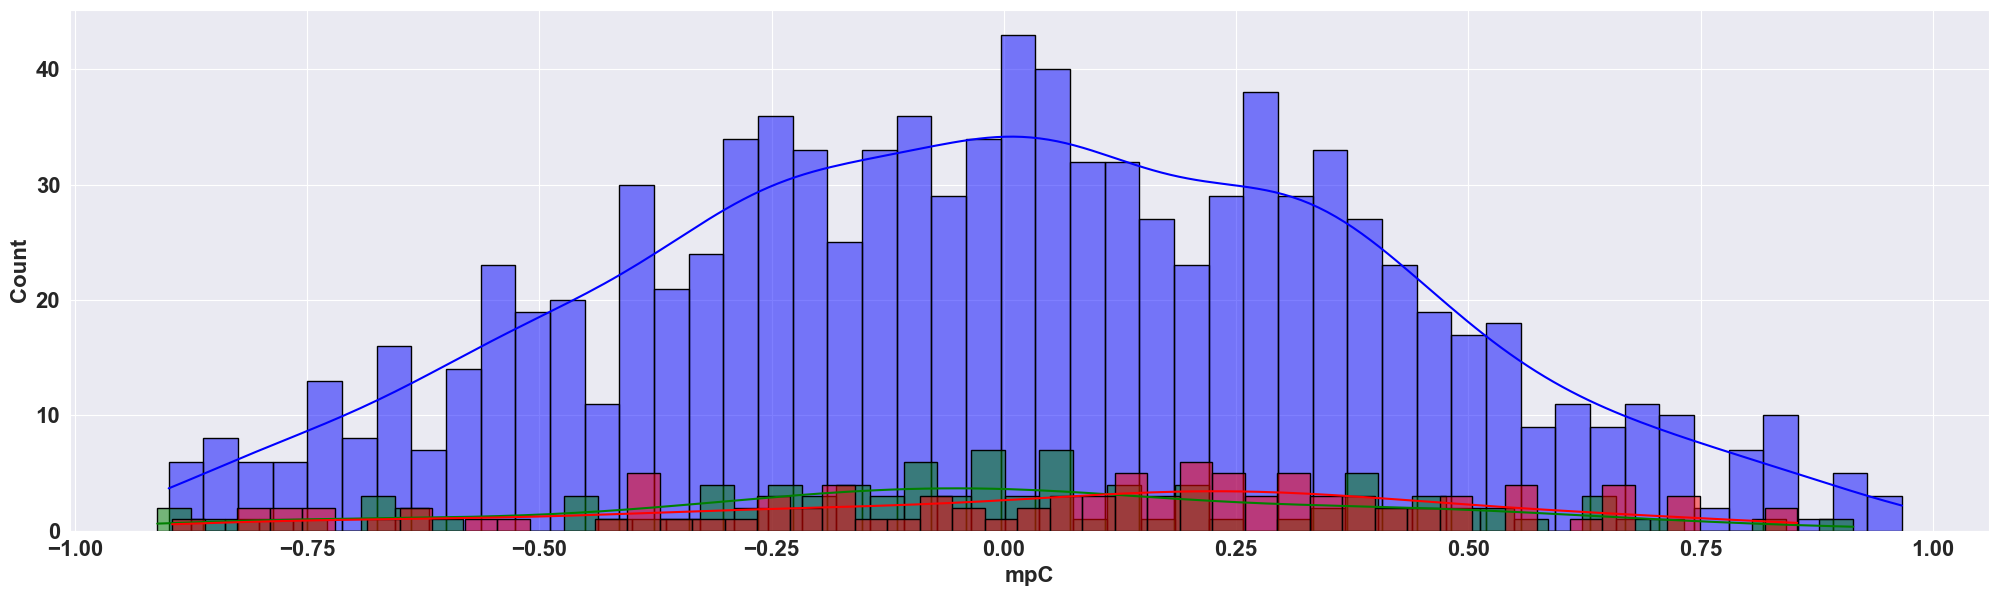

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = np.random.random(1000)
val = np.random.random(100)
test = np.random.random(100)

target_train = np.random.random(1000)
target_val = np.random.random(100)
target_test = np.random.random(100)

sns.histplot(train, bins=20, color='blue', alpha=0.5, label='Array 1')
sns.histplot(test, bins=20, color='red', alpha=0.5, label='Array 2')
sns.histplot(val, bins=20, color='green', alpha=0.5, label='Array 3')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Three Arrays')
plt.legend()

plt.show()

from grape.plots import residual_density_plot
residual_density_plot(train_pred=train, val_pred=val, test_pred=test,
                      train_target=target_train, val_target=target_val, test_target=target_test)



maybe something like x.edge_attr-x_i.edge_attr

In [1]:
dict = {1:'train', 2:'val', 3:'test'}
if 1 in dict:
    print(dict[1])

train
